In [ ]:
import networkx as nx
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
# Potency of messaging levels for red team agent (1-5) 
# 1 = low potency
# 5 = high potency


In [16]:
def networkanalysis():
    """
    This function reads the network-2.csv  and creates a dictionary.
    In each line, if it's 1,2 add 2 to 1's neighbors and 1 to 2's neighbors
    """
    list_edges = []
    with open("network-2.csv") as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        for row in lines[1:]:
            row = row.split(",")
            list_edges.append((int(row[0]), int(row[1])))
    
    return list_edges
    #create a copy of graph and add edges from list_edges
    # print(list_edges)
    # G = nx.DiGraph()
    # G.add_edges_from(list_edges)
    # nx.draw(G)
    # plt.show()


In [24]:
def read_network():
    """
    This Function reads the node-attributes.txt file and creates a graph based on the attributes, assigning ID to each node and also the node's team.
    """
    G = nx.Graph()
    with open("node-attributes.txt") as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        for row in lines[1:]:
            row = row.split(",")
            G.add_node(int(row[0]), team=row[1])
    # print(G.nodes(data=True))
    return seperate_teams(G)


def seperate_teams(graph):
    """
    This function takes the initial graph and return three separate graphs for each team 
    i.e. Green, Blue, Red and Grey (if grey it also includes if they are good or bad)
    """   
    green_team = nx.Graph()
    red_team = nx.Graph()
    blue_team = nx.Graph()
    grey_team = nx.Graph()
    for node in graph.nodes(data=True):
        if node[1]['team'] == 'green':
            green_team.add_node(node[0], team=node[1]['team'])
        elif node[1]['team'] == 'red':
            red_team.add_node(node[0], team=node[1]['team'])
        elif node[1]['team'] == 'blue':
            blue_team.add_node(node[0], team=node[1]['team'])
        elif node[1]['team'].split("-")[0] == 'grey':
            grey_team.add_node(node[0], team=node[1]['team'])

    return green_team, red_team, blue_team, grey_team

def initialize_green_team(green_team):
    """
    This function takes the green team, creates a new graph with the same nodes and assigns a random opinion(X) to each node and random uncertainty(U) to each node
    in the range [-1,1] 
    x : 1 or 0, 1 = pro-voting, 0 = anti-voting
    """
    new_green_team = nx.Graph()
    for node in green_team.nodes(data=True):
        new_green_team.add_node(node[0], X = random.randint(0,1), U = round(random.uniform(-1,1),1))
    return new_green_team

def visualize_graph(graph):
    """
    This function takes a graph and visualizes it
    """
    new_graph = nx.Graph()
    blue_count = 0
    red_count = 0
    for node in graph.nodes(data=True):
        color = ""
        if node[1]['X'] == 1:
            color = "blue"
            blue_count += 1
        else:
            color = "red"
            red_count += 1
        new_graph.add_node(node[0], color = color)
    
    #Visualize the graph with the X values as the node color, show the edges and the node labels
    nx.draw(new_graph, node_color = [node[1]['color'] for node in new_graph.nodes(data=True)], with_labels = True)
    #label the graph with the number of blue and red nodes
    plt.title("Blue: " + str(blue_count) + " Red: " + str(red_count))
    
    plt.show()


Welcome to the game
Initialising the green team assigning random opinions and uncertainty
Beep Boop
Green Team is: 


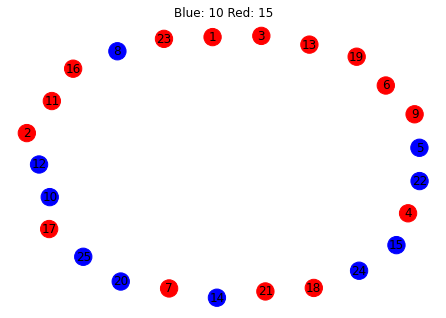

Starting the simulation


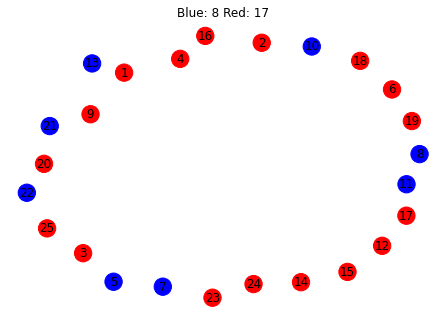

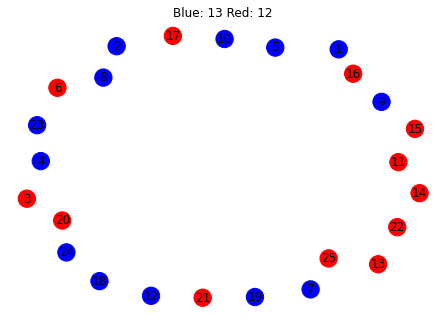

In [25]:
  
def main():
    """
    Main function that runs the simulation
    """
   
    print("Welcome to the game")
    
    # print("Current Graph is: ")
    
    green_team, red_agent, blue_agent , grey_team= read_network()
    
    print("Initialising the green team assigning random opinions and uncertainty")
   
    print("Beep Boop")
   
    print("Green Team is: ")
   
    green_team = initialize_green_team(green_team)
    
    visualize_graph(green_team)
    
    choice = input("Do you want to begin the simulation? (y/n)")
    
    if choice == 'y' or choice == 'Y':
        print("Starting the simulation")
        
        #Green-2-Green Interaction
        
        green_team = green_interaction(green_team)

        #Visualize the graph
        visualize_graph(green_team) 
\
main()

In [20]:
def green_interaction(green_graph):
    """
    A node's intent to vote can be determined by the X value, if X = 1, then the node is pro-voting, if X = 0, then the node is anti-voting.
    This function simulates the green-to-green interaction, where each node interacts with its neighbours and updates its opinion and uncertainty.
    For e.g. for two nodes A and B, if U(A) > U(B), it changes its opinion to that of A and uncertainity is calculated using the function.
    
    Important: 
    Rules:
        1. If both the nodes have same opinion, the X remains same but the U changes, U = U1 + U2/2.
        2. If both the nodes dont have the same opinion, the X changes to the opinion of the node with higher U and the U is calculated using the function.
    """
    
    networkability = networkanalysis()
    
    for edge in networkability:
        first_node = edge[0]
        second_node = edge[1]
        
        # First Case : Compare their Opinion.
        if green_graph.nodes[first_node]['X'] == green_graph.nodes[second_node]['X']:
            #In this case, the opinion remains the same but the uncertainty changes and 
            #they become more certain about their opinion
            green_graph.nodes[first_node]['U'] = (green_graph.nodes[first_node]['U'] - green_graph.nodes[second_node]['U'])/2
            green_graph.nodes[second_node]['U'] = (green_graph.nodes[first_node]['U'] - green_graph.nodes[second_node]['U'])/2
            
        # Second Case : Compare their Uncertainty
        elif green_graph.nodes[first_node]['U'] < green_graph.nodes[second_node]['U']:
            #In this case, the opinion of the first node is taken and the uncertainty is calculated using the function
            green_graph.nodes[second_node]['X'] = green_graph.nodes[first_node]['X']
            green_graph.nodes[second_node]['U'] = calculate_uncertainty(green_graph.nodes[first_node]['U'], green_graph.nodes[second_node]['U'])

        elif green_graph.nodes[first_node]['U'] > green_graph.nodes[second_node]['U']:
            #In this case, the opinion of the second node is taken and the uncertainty is calculated using the function
            green_graph.nodes[first_node]['X'] = green_graph.nodes[second_node]['X']
            green_graph.nodes[first_node]['U'] = calculate_uncertainty(green_graph.nodes[second_node]['U'], green_graph.nodes[first_node]['U'])
        
    return green_graph


def calculate_uncertainty(U1, U2):
    """
    This function calculates the uncertainty of a node based on the uncertainty of the other node.
    """
    return (U1 - U2)/2

def assigning_agents(r_agent,b_agent):
    """
    This function initializes the red and blue agents with their respective opinions and uncertainty.
    
    U(R) = -1 and U(B) = -1
    X(R) = 0 and X(B) = 1 
    """
    for node in r_agent.nodes(data=True):
        r_agent.nodes[node[0]]['X'] = 0
        r_agent.nodes[node[0]]['U'] = -1
        
    for node in b_agent.nodes(data=True):
        b_agent.nodes[node[0]]['X'] = 1
        b_agent.nodes[node[0]]['U'] = -1
        
    return r_agent, b_agent


# Interactions

In [26]:
def red_turn(green_team):
    potency = random.randint(1,5)
    
    print("Potency of the message is: ", potency)
    
    print("Red Agent is sending a message to the Green Team")
    
    for node in green_team.nodes(data=True):
        
        
        
        
def red_interaction(opinion, uncertainty, potency):
    """
    This function simulates the red-to-green interaction, where the red agent interacts with the green nodes and changes their opinion and uncertainty.
    
    Assumptions:
    1. If the Opinion of the green node is 1 and uncertainty is -1 to -0.5, 
    """

NameError: name 'red' is not defined

# Messages 



In [27]:

misinformation = [
"1. The voting process is rigged, it's already decided who will win. (Potency = 5)\n
"2. Voting for a democratic election is a waste of time.\n"
"3. The voting process is not transparent, the results are not reliable. \n"
"4. The voting process is not secure, it can be hacked.\n"  
"5. The voting process is not safe, it can be attacked. \n"
"6. The voting process is not fair, it is biased.\n"    
"7. The voting process is not democratic, it is not inclusive. \n"
"8. The voting process is not reliable, it is not accurate. \n"
"9. The voting process is not trustworthy, it is not honest. \n"
"10. The voting process is not effective, it is not efficient. \n"
]
# 1. The voting process is transparent, the results are reliable.
# 2. The voting process is secure, it cannot be hacked.
# 3. The voting process is safe, it cannot be attacked.
# 4. The voting process is fair, it is not biased.
# 5. The voting process is democratic, it is inclusive.
# 6. The voting process is reliable, it is accurate.
# 7. The voting process is trustworthy, it is honest.
# 8. The voting process is effective, it is efficient.
# 9. The voting process is not rigged, it is not decided who will win.
# 10. The voting process is not a waste of time.





["1. The voting process is rigged, it's already decided who will win.\n2. Voting for a democratic election is a waste of time.\n3. The voting process is not transparent, the results are not reliable. \n4. The voting process is not secure, it can be hacked.\n5. The voting process is not safe, it can be attacked. \n6. The voting process is not fair, it is biased.\n7. The voting process is not democratic, it is not inclusive. \n8. The voting process is not reliable, it is not accurate. \n9. The voting process is not trustworthy, it is not honest. \n10. The voting process is not effective, it is not efficient. \n"]


# Minimax


In [ ]:
def minimax(agent, green_team):
    """
    This function is used to select the best next message based on current situation and previously ran simulations.
    
    If blue : 
        1. Checks current energy, if the energy is running low; it has the option of choosing a grey agent.
        ( A grey agent can either be a spy or an ally) Using grey agent doesnt consume any energy.
        2. If the energy is not considerably low, it can choose a message from Correction list and 
    """